<em><sub>This page is available as an executable or viewable <strong>Jupyter Notebook</strong>:</sub></em>
<br/><br/>
<a href="https://mybinder.org/v2/gh/JetBrains/lets-plot/v1.5.2demos1?filepath=docs%2Fexamples%2Fjupyter-notebooks%2Fimage_fisher_boat.ipynb"
   target="_parent"> 
   <img align="left" 
        src="https://mybinder.org/badge_logo.svg">
</a>
<a href="https://nbviewer.jupyter.org/github/JetBrains/lets-plot/blob/master/docs/examples/jupyter-notebooks/image_fisher_boat.ipynb" 
   target="_parent"> 
   <img align="right" 
        src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.png" 
        width="109" height="20">
</a>
<br/>
<br/>

# geom_image

*geom\_image* displays an image specified by a ndarray with shape (n,m) or (n,m,3) or (n,m,4).

A regular PNG image, for instance, can be read as `ndarray` using `imread` method from `matplotlib.image` package. 

In [1]:
import numpy as np
import pandas as pd
from lets_plot import *

LetsPlot.setup_html()

In [2]:
# Load image file.
from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://raw.githubusercontent.com/JetBrains/lets-plot/master/docs/examples/images/fisher_boat.png')
image = Image.open(BytesIO(response.content))
img = np.asarray(image)
img.shape

(225, 225, 3)

### RGB image

N x M x 3 ndarray specifies a color RGB image.



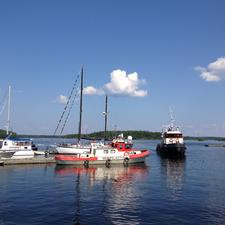

In [3]:
ggplot() + geom_image(image_data=img) + ggtitle('geom_image (RGB)')

### RGBA and gray-scale image

N x M x 4 ndarray specifies a color RGBA image and N x M ndarray specifies a gray-scale image.

Lets drop all color channels but `red` to transform our (n,m,3) ndarray to (n,m) shape.

In [4]:
img_gs = img[:,:,0]
img_gs.shape

(225, 225)


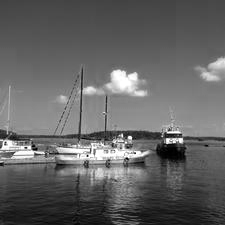

In [5]:
ggplot() + geom_image(image_data=img_gs) + ggtitle('geom_image (gray scale)')

### geom_raster

The standart `geom_raster` function also displays image. But unlike `geom_image`, `geom_raster` doesn't accept `ndarray` as an input.

Like all other `geom_xxx` functions `geom_raster` requires observations-style input data and aestetic mapping.

This is not very convenient when the data is originally in the shape of `ndarray`. On the other hand, aesthetic mapping and scaling might come in handy when rendering an image.

Lets transform the image data to a form suitable for `geom_raster`.

In [6]:
# reshape 3-dimentional ndarray to 2-dimentional long-form ndarray
# and then to data frame with columns x,y,r,g,b
cols, rows, _ = img.shape
img_lf = img.reshape(cols * rows, -1)
img_df = pd.DataFrame(img_lf,columns=['r','g','b'])
X_mesh, Y_mesh = np.meshgrid(np.arange(rows), np.arange(cols))
img_df['x'] = X_mesh.reshape(-1)
img_df['y'] = Y_mesh.reshape(-1)[::-1]

# Pack color components values to 24-bit RGB values 
c_fill = img_df.apply(lambda row: ((int(row['r'] * 255) << 16) + 
                                   (int(row['g'] * 255) << 8) +
                                   int(row['b'] * 255)),
                      axis=1)

In [7]:
# Show image in pseudo colors with only few gradations 
ggplot(img_df) + geom_raster(aes('x', 'y', fill=c_fill))\
        + scale_fill_brewer()\
        + ggtitle('geom_raster (with brewer palette)') + ggsize(800,500)